# 01 – VIR Telemetry Exploration

Goal: sanity-check the raw TRD telemetry for a single VIR race and
a single car, and look for basic insights:

- Are time and distance behaving as expected?
- Can we see lap structure?
- What does a typical lap look like (speed, throttle, brake)?

In [1]:
pip install pandas numpy matplotlib jupyter

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

In [3]:
config_path = Path("../data/track_configs.csv")
print("Config path:", config_path)
print("Exists? ->", config_path.exists())

track_df = pd.read_csv(config_path)
track_df.head()

Config path: ../data/track_configs.csv
Exists? -> True


,track_id,name,circuit_length_m,sector1_m,sector2_m,sector3_m,pit_lane_length_m,pit_lane_time_s,pit_in_from_sf_m,pit_out_from_sfp_m,gps_finish_lat,gps_finish_lon,gps_pit_in_lat,gps_pit_in_lon,gps_pit_out_lat,gps_pit_out_lon
0,sebring,Sebring International Raceway,6018.90,1824.20,1863.70,2331.00,542.30,39.0,5842.20,365.20,27.450234,-81.353698,27.450120,-81.355470,27.450110,-81.350510
1,sonoma,Sonoma Raceway,4031.38,1385.00,1422.00,1225.00,623.90,45.0,-519.25,95.90,38.161514,-122.454717,38.161514,-122.454717,38.161514,-122.454717
2,virginia-international-raceway,Virginia International Raceway,5262.60,1652.60,2158.00,1452.00,340.60,25.0,4898.70,-16.00,36.568817,-79.206664,36.567581,-79.210428,36.568667,-79.206797
3,indianapolis,Indianapolis Motor Speedway – Road Course,3925.21,1364.28,1387.86,1173.99,865.43,63.0,3415.31,394.84,39.793150,-86.238870,39.789410,-86.237300,39.786960,-86.238810
4,circuit-of-the-americas,Circuit of the Americas,5498.30,1308.80,2240.00,1949.50,509.30,36.0,5284.90,393.80,30.133528,-97.642258,30.134337,-97.634026,30.131445,-97.638921


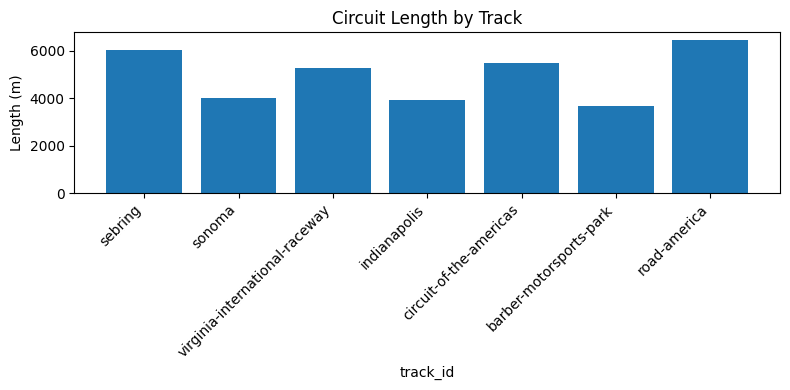

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(track_df["track_id"], track_df["circuit_length_m"])
ax.set_title("Circuit Length by Track")
ax.set_xlabel("track_id")
ax.set_ylabel("Length (m)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

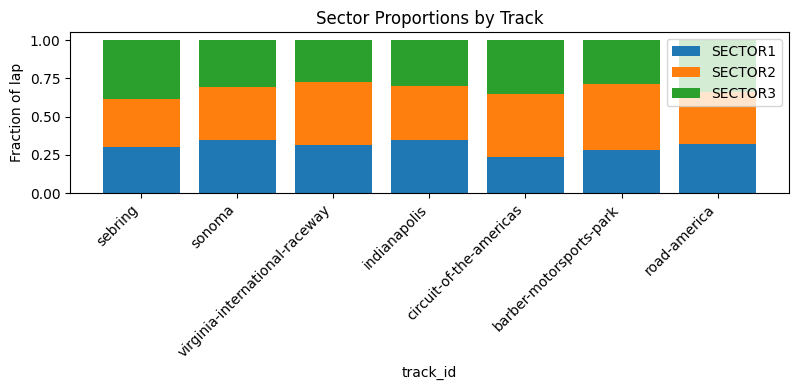

In [6]:
sector_cols = ["sector1_m", "sector2_m", "sector3_m"]

# Each sector as a fraction of total lap length
sectors_norm = track_df[sector_cols].div(track_df["circuit_length_m"], axis=0)

fig, ax = plt.subplots(figsize=(8, 4))

bottom = None
for col in sector_cols:
    values = track_df[col] / track_df["circuit_length_m"]
    label = col.replace("_m", "").upper()
    if bottom is None:
        ax.bar(track_df["track_id"], values, label=label)
        bottom = values
    else:
        ax.bar(track_df["track_id"], values, bottom=bottom, label=label)
        bottom = bottom + values

ax.set_title("Sector Proportions by Track")
ax.set_xlabel("track_id")
ax.set_ylabel("Fraction of lap")
plt.xticks(rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

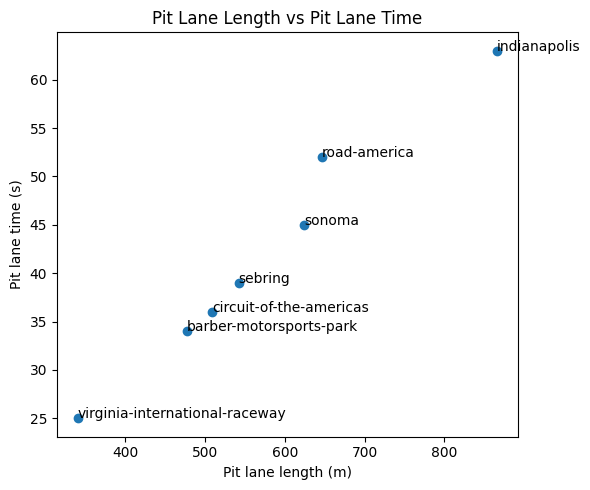

In [7]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.scatter(track_df["pit_lane_length_m"], track_df["pit_lane_time_s"])

for _, row in track_df.iterrows():
    ax.annotate(row["track_id"], (row["pit_lane_length_m"], row["pit_lane_time_s"]))

ax.set_title("Pit Lane Length vs Pit Lane Time")
ax.set_xlabel("Pit lane length (m)")
ax.set_ylabel("Pit lane time (s)")

plt.tight_layout()
plt.show()

In [8]:
track_df["pit_time_per_100m"] = track_df["pit_lane_time_s"] / (track_df["pit_lane_length_m"] / 100)
track_df[["track_id", "pit_time_per_100m"]].sort_values("pit_time_per_100m", ascending=False)

,track_id,pit_time_per_100m
6,road-america,8.039758
2,virginia-international-raceway,7.339988
3,indianapolis,7.279618
1,sonoma,7.212694
0,sebring,7.191591
5,barber-motorsports-park,7.122394
4,circuit-of-the-americas,7.068525
